# The purpose is to show the AGN

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic','k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[0])


In [11]:
filelist=os.listdir(SEDfile_dir) 

In [12]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

## Find the star-names in the files

In [13]:
agn_header = []
agn_file = []
for filename in filelist:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        agn_header.append(hdr)
        agn_file.append(filename)

In [14]:
agn_names = []
index=0
for hdr in agn_header: 
        agn_name=agn_header[index]['TARGETID']
        agn_names.append(agn_name)
        index+=1


In [15]:
print agn_names

['LINER', 'Model SPectrum of Seyfert 2 Galaxy NGC 1068', 'Bright QSO', 'Seyfert1', 'Seyfert 2']


In [16]:
print agn_file

['liner_template.fits', 'ngc1068_template.fits', 'qso_template.fits', 'seyfert1_template.fits', 'seyfert2_template.fits']


In [17]:
agnames_and_agnfiles = zip(agn_names, agn_file)

## Make a dictionary of filenames

In [18]:
AGNDict= {}
for agn,thefile in agnames_and_agnfiles:
    print agn,': '
    AGNDict[agn]=thefile
    print AGNDict[agn] 

LINER : 
liner_template.fits
Model SPectrum of Seyfert 2 Galaxy NGC 1068 : 
ngc1068_template.fits
Bright QSO : 
qso_template.fits
Seyfert1 : 
seyfert1_template.fits
Seyfert 2 : 
seyfert2_template.fits


## Plot the SED

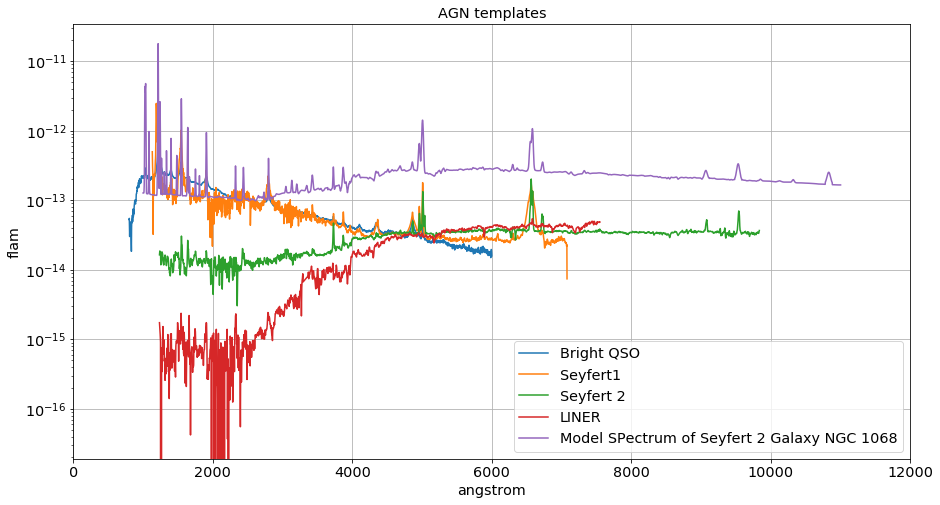

In [19]:
for keyagn in AGNDict:
    the_file=AGNDict[keyagn]
        
    selected_file=the_file
    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
    sed=S.FileSpectrum(selected_fullfile)
        
    plt.semilogy(sed.wave,sed.flux,label=keyagn)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("AGN templates")
    plt.savefig("agn.png")